#Stack overflow surveys analysis

In this project, we are going to analyze 2020 Stack Overflow Developer Survey. We are going to examine all aspects of the developer experience from career satisfaction and job search to education and opinions on open source software. We are also going through the most popular programming languages and we are analyzing the salaries per country and depending on the qualifications of the developper.

The dataset we are using is provided by: https://insights.stackoverflow.com/survey With nearly 65,000 responses fielded from over 180 countries and dependent territories. The first challenge we are facing is improving the data quality. Since the data is collected from a survey, there are many unusered questions, which means null values. Also, we could be tricked by the salaries. So, we will have certaintly outliers.

#Loading data

In [640]:
import pandas as pd 

In [641]:
df = pd.read_csv('survey_results_public.csv')
schema_df= pd.read_csv('survey_results_schema.csv')

In [642]:
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,NaN,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,White or of European descent,Man,Flex time or a flexible schedule;Office enviro...,Slightly dissatisfied,"I’m not actively looking, but I am open to new...",NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Not at all important/not necessary,Curious about other opportunities;Wanting to w...,NaN,Once a year,Not sure,Yes,Yes,Occasionally: 1-2 days per quarter but less th...,NaN,NaN,Stack Overflow (public Q&A for anyone who code...,NaN,Lin

In [643]:
schema_df.head()

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,Age,What is your age (in years)? If you prefer not...
4,Age1stCode,At what age did you write your first line of c...


#Assessing of data 
After loading the data, It’s time to gain some high-level overview of the type of data we are dealing with. 


Let's see the number of rows and columns present in the data set

In [644]:
print('Number of rows: ',df.shape[0],'\nNumber of columns: ',df.shape[1])


Number of rows:  64461 
Number of columns:  61


Each column represent a question asked. 
Each row represents the answers from a participant in the survey. 
The question is not fully displayed in the previous data frame. 
The schema data frame is made to give the full question asked for each column.
That's why the number of columns in the principal df is the number of rows in the schema df. 

In [645]:
print('Number of rows in the schema df: ',schema_df.shape[0],'\nNumber of columns in the schema df: ',schema_df.shape[1])


Number of rows in the schema df:  61 
Number of columns in the schema df:  2


Now let's have an idea of columns present in the data set, along with the data type and number of non-null values.

In [646]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    64461 non-null  int64  
 1   MainBranch                    64162 non-null  object 
 2   Hobbyist                      64416 non-null  object 
 3   Age                           45446 non-null  float64
 4   Age1stCode                    57900 non-null  object 
 5   CompFreq                      40069 non-null  object 
 6   CompTotal                     34826 non-null  float64
 7   ConvertedComp                 34756 non-null  float64
 8   Country                       64072 non-null  object 
 9   CurrencyDesc                  45472 non-null  object 
 10  CurrencySymbol                45472 non-null  object 
 11  DatabaseDesireNextYear        44070 non-null  object 
 12  DatabaseWorkedWith            49537 non-null  object 
 13  D

The above output shows the name of columns, along with several non-null values and the data type of each column. From the above output, it is clear that some columns have missing values, which we need to deal with in Data Cleaning stage.

In [647]:
schema_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Column        61 non-null     object
 1   QuestionText  61 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB


Let's have a look at the first row, which represents the answer of the first participant. 

In [648]:
df.loc[0]
#the answers of the first person

Respondent                                                  1
MainBranch                     I am a developer by profession
Hobbyist                                                  Yes
Age                                                       NaN
Age1stCode                                                 13
                                       ...                   
WebframeWorkedWith                       ASP.NET;ASP.NET Core
WelcomeChange         Just as welcome now as I felt last year
WorkWeekHrs                                                50
YearsCode                                                  36
YearsCodePro                                               27
Name: 0, Length: 61, dtype: object

Let's focus on the column 'Hobbyist'. 
In order to understand that column we need to look for it in the schema df. 



In [649]:
schema_df.head()

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,Age,What is your age (in years)? If you prefer not...
4,Age1stCode,At what age did you write your first line of c...


The column 'Hobbyist' shows that the question text was : 'Do you code as a hobby?' 



In order to facilitate the search of the corresponding question, we will set the column :'columns' in the data frame schema_df as indexes



In [650]:
schema_df.set_index('Column',inplace=True)

Now, if we want to know what 'Hobbyist' means in the principal dataframe,all we have to do is: 

In [651]:
schema_df.loc['Hobbyist']

QuestionText    Do you code as a hobby?
Name: Hobbyist, dtype: object

And easily, we understand that the question was : 'Do you code as a hobby?' 

Let's understand the meaning of other columns: 

In [652]:
schema_df.loc['NEWJobHuntResearch']

QuestionText    When job searching, how do you learn more abou...
Name: NEWJobHuntResearch, dtype: object

In [653]:
schema_df.loc['NEWPurchaseResearch']

QuestionText    When buying a new tool or software, how do you...
Name: NEWPurchaseResearch, dtype: object

In [654]:
schema_df.loc['ConvertedComp']

QuestionText    Salary converted to annual USD salaries using ...
Name: ConvertedComp, dtype: object

Let's have an idea of how many participants code as a hobby. 

In [655]:
df['Hobbyist'].value_counts()

Yes    50388
No     14028
Name: Hobbyist, dtype: int64

In [656]:
df['Hobbyist'].value_counts(normalize=True)

Yes    0.782228
No     0.217772
Name: Hobbyist, dtype: float64

So, around 78% of participants code as a hobby.

Let's take a look at the gender of programmers.

In [657]:
df['Gender'].value_counts(normalize=True)

Man                                                            0.910121
Woman                                                          0.076033
Non-binary, genderqueer, or gender non-conforming              0.007615
Man;Non-binary, genderqueer, or gender non-conforming          0.002393
Woman;Non-binary, genderqueer, or gender non-conforming        0.001820
Woman;Man                                                      0.001503
Woman;Man;Non-binary, genderqueer, or gender non-conforming    0.000514
Name: Gender, dtype: float64

Around 90% of programmers who answered the surveys was men. 
64461 people answered the survey. 90% of them where men. 
We could understand that the percentage of womens is low compared to other fields.  

In [658]:
df['Respondent'].value_counts()

2047     1
49805    1
31386    1
25241    1
27288    1
        ..
15725    1
13676    1
3435     1
1386     1
2049     1
Name: Respondent, Length: 64461, dtype: int64

So, since the column 'Respondent' is the unique identifier of the participant, we can set it as an index.

In [659]:
df.set_index('Respondent',inplace=True)

In [660]:
schema_df.loc['ConvertedComp']

QuestionText    Salary converted to annual USD salaries using ...
Name: ConvertedComp, dtype: object

In [661]:
df.shape

(64461, 60)

We have 60 columns.Each column is a question in the survey.

They are not all unteresting for our analysis.

So, we are going to keep just the columns we need. 
These columns are: 


MainBranch, Hobbyist, Age, ConvertedComp, Country, DatabaseWorkedWith,DevType, Employment, Gender, LanguageWorkedWith, WebframeWorkedWith,YearsCode.

In [662]:
new_df=df[['MainBranch','Age','Country','Employment','Hobbyist','LanguageWorkedWith','DatabaseWorkedWith','WebframeWorkedWith','ConvertedComp' ]]

In [663]:
new_df.shape

(64461, 9)

We have now 9 columns instead of 60. 

We have also sorted the columns in a more suitable and logical way. 
First, we have the main branch of the dvelopper.

Then, comes some of its information as the age,country,employment and wheter he or she codes as a hobby.  

After that, we have the languages,the databases and the frameworks worked with. 
Finally, we have the salary.

The column 'ConvertedComp' is : 
We know that aftr checking its meaning in the schema df as shown below. 

That's why it's better to change the column name. 



In [664]:
schema_df.loc['ConvertedComp']

QuestionText    Salary converted to annual USD salaries using ...
Name: ConvertedComp, dtype: object

In [665]:
#renaming the column ConvertedComp to a clearer name
new_df.rename(columns={'ConvertedComp':'SalaryUSD'}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [666]:
new_df.head(1)

,MainBranch,Age,Country,Employment,Hobbyist,LanguageWorkedWith,DatabaseWorkedWith,WebframeWorkedWith,SalaryUSD
Respondent,,,,,,,,,
1,I am a developer by profession,NaN,Germany,"Independent contractor, freelancer, or self-em...",Yes,C#;HTML/CSS;JavaScript,Elasticsearch;Microsoft SQL Server;Oracle,ASP.NET;ASP.NET Core,NaN


# Data cleaning

At this stage, we are going to detect and correct missing, or inaccurate records from our data set. In this process, data present in the “raw” form (having missing, or inaccurate values) are cleaned appropriately so that the output data is void of missing and inaccurate values.

Let's check for missing data.

Below, False means no missing data.

In [667]:
new_df.isnull()

,MainBranch,Age,Country,Employment,Hobbyist,LanguageWorkedWith,DatabaseWorkedWith,WebframeWorkedWith,SalaryUSD
Respondent,,,,,,,,,
1,False,True,False,False,False,False,False,False,True
2,False,True,False,False,False,False,True,True,True
3,False,True,False,True,False,False,True,True,True
4,False,False,False,True,False,True,True,True,True
5,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...
64858,True,True,False,False,False,True,True,True,True
64867,True,True,False,False,False,False,False,True,True
64898,True,True,False,True,False,True,True,True,True


In [668]:
new_df.shape

(64461, 9)

In [669]:
# Total Number of Missing NA
new_df.isnull().sum().sum()

94249

We have 64461 rows in our dataset. 
And, we have 94249 missing values. They are distributed in the different 9 columns. It makes sense because we have 9 columns. Plus, it's a survey, so people don't have to answer all of the questions.


Let's check the number of missing values for each column. 

In [670]:
new_df.isnull().sum()

MainBranch              299
Age                   19015
Country                 389
Employment              607
Hobbyist                 45
LanguageWorkedWith     7083
DatabaseWorkedWith    14924
WebframeWorkedWith    22182
SalaryUSD             29705
dtype: int64

* We have 299 missing values for  the MainBranch 

* We have 19015 missing values for the column age. 

* 389 missing values for the country.

* 607 missing values for the employment.

* 45 missing values for Hobbyist.

* 7083 missing values for the languages worked with.

* 14924 missing values for the databases worked with.

* 22182 missing values for the web frameworks worked with. 

* 29705 missing values for the salary. 

` **Dealing with the variable age**

In [671]:
new_df['Age'].describe()

count    45446.000000
mean        30.834111
std          9.585392
min          1.000000
25%         24.000000
50%         29.000000
75%         35.000000
max        279.000000
Name: Age, dtype: float64

In [672]:
print('Number of Missing values in Age:',new_df['Age'].isnull().sum())

Number of Missing values in Age: 19015


In [673]:
new_df.dropna(subset = ["Age"], inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [674]:
print('Number of missing values in age: ',new_df['Age'].isnull().sum())

Number of missing values in age:  0


Now, we have no missing values for the age.

In [675]:
#changing the type of the age , so if someone is 25.5, we'll make it 25
new_df['Age'] = new_df['Age'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [679]:
new_df.dtypes

MainBranch             object
Age                     int64
Country                object
Employment             object
Hobbyist               object
LanguageWorkedWith     object
DatabaseWorkedWith     object
WebframeWorkedWith     object
SalaryUSD             float64
dtype: object

Let's look for outliers for the age.

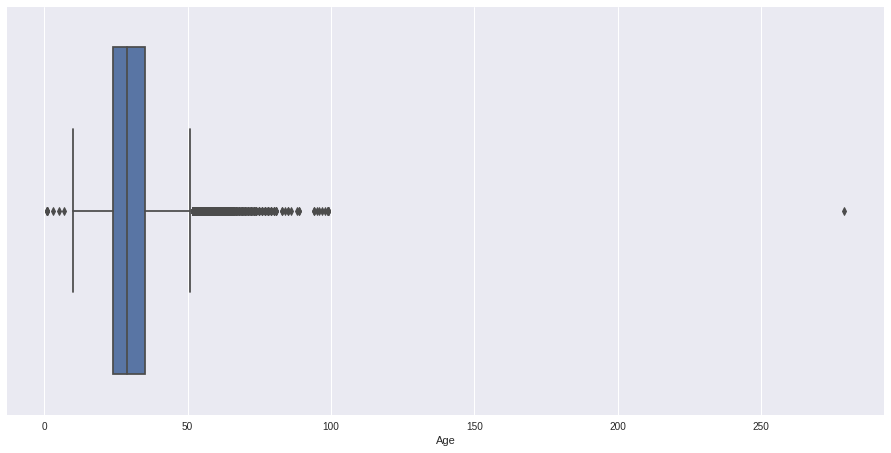

In [677]:
import seaborn as sns
sns.boxplot(x=new_df['Age'])

In [678]:
index_names = new_df[ (new_df['Age'] >= 100) & (new_df['Age'] <= 15)].index
  
# drop these given row
# indexes from dataFrame
new_df.drop(index_names, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


**Dealing with the salary**

In [680]:
new_df['SalaryUSD'].describe()

count    3.059600e+04
mean     1.032371e+05
std      2.239111e+05
min      0.000000e+00
25%      2.594400e+04
50%      5.404900e+04
75%      9.500000e+04
max      2.000000e+06
Name: SalaryUSD, dtype: float64

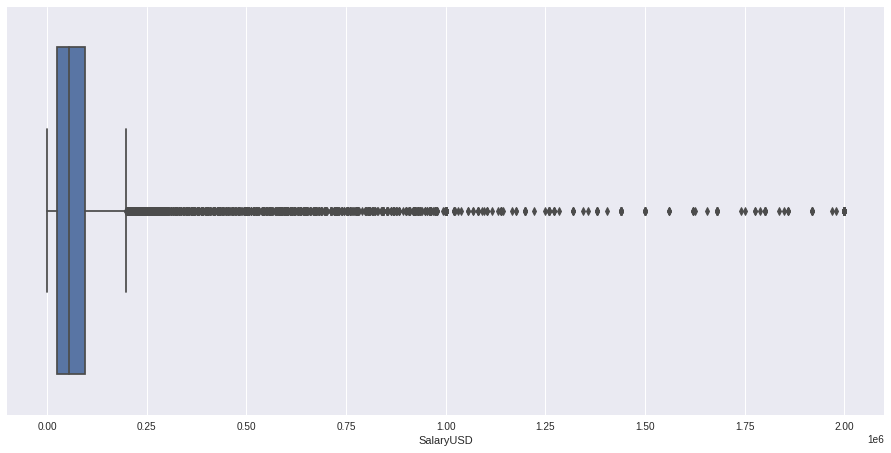

In [681]:
sns.boxplot(x=new_df['SalaryUSD'])

We have a lot of missing values in the salary. We can't drop them. 
We can't also do an imputation with the mean because the box plot above shows that, we have outliers. In fact, the mean is affected heavily by outliers.



Salary column has a mean of 1.037561e+05 and a standard deviation of 2.2.268853e+05.  we will generate a list of random numbers equal to the length of missing values, between (mean-standard deviation) and (mean+standard deviation). Then we can fill up the missing values in the Data Frame with that of those in the list.



In [683]:
print('Number of Missing values in SalaryUSD:',new_df['SalaryUSD'].isnull().sum())

Number of Missing values in SalaryUSD: 14850


In [684]:
import random
import numpy as np
mean = new_df['SalaryUSD'].mean()
std = new_df['SalaryUSD'].std()
lower_limit = round(mean-std,0)
upper_limit = round(mean+std,0)
random_list=[]
for i in range(0,29705):
    random_list.append(random.randint(lower_limit,upper_limit))
random_list=np.array(random_list)
salary=new_df['SalaryUSD'].values
k=0
for i,j in enumerate(salary):
  if np.isnan(salary[i]):
    a=random_list[k]
    if a <0 :
      salary[i]=0
    else: 
      salary[i]=a
    k+=1
new_df['SalaryUSD']=salary

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [685]:
print('Number of Missing values in SalaryUSD:',new_df['SalaryUSD'].isnull().sum())

Number of Missing values in SalaryUSD: 0


**Dealing with the variables:**
*  **LanguageWorkedWith**
* **DatabaseWorkedWith**
* **WebframeWorkedWith**


For the languages worked with, the databases worked with and the web frameworks worked with. 

We are going to create an other variable and do an imputation of the missing values using a new variable "missing"


In [686]:
print('Number of Missing values in LanguageWorkedWith:',new_df['LanguageWorkedWith'].isnull().sum())
print('Number of Missing values in DatabaseWorkedWith:',new_df['DatabaseWorkedWith'].isnull().sum())
print('Number of Missing values in WebframeWorkedWith:',new_df['WebframeWorkedWith'].isnull().sum())

Number of Missing values in LanguageWorkedWith: 418
Number of Missing values in DatabaseWorkedWith: 6371
Number of Missing values in WebframeWorkedWith: 11628


In [687]:
new_df['LanguageWorkedWith'].fillna("missing",inplace=True)
new_df['DatabaseWorkedWith'].fillna("missing",inplace=True)
new_df['WebframeWorkedWith'].fillna("missing",inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [688]:
print('Number of Missing values in LanguageWorkedWith:',new_df['LanguageWorkedWith'].isnull().sum())
print('Number of Missing values in DatabaseWorkedWith:',new_df['DatabaseWorkedWith'].isnull().sum())
print('Number of Missing values in WebframeWorkedWith:',new_df['WebframeWorkedWith'].isnull().sum())

Number of Missing values in LanguageWorkedWith: 0
Number of Missing values in DatabaseWorkedWith: 0
Number of Missing values in WebframeWorkedWith: 0


Now, we have no missing values for these variables.

` **Dealing with the variable Employment and Hobbyist**

In [689]:
new_df['Employment'].value_counts()

Employed full-time                                      32706
Student                                                  5195
Independent contractor, freelancer, or self-employed     4009
Not employed, but looking for work                       1536
Employed part-time                                       1507
Not employed, and not looking for work                    210
Retired                                                   159
Name: Employment, dtype: int64

In [690]:
print('Number of Missing values in Employment:',new_df['Employment'].isnull().sum())

Number of Missing values in Employment: 124


In [691]:
new_df['Hobbyist'].value_counts()

Yes    35708
No      9738
Name: Hobbyist, dtype: int64

In [692]:
print('Number of Missing values in Hobbyist:',new_df['Hobbyist'].isnull().sum())

Number of Missing values in Hobbyist: 0


In 'Employment', we have 607 missing values.
if we are going to study careers, we need to be sure of that variable. 

In 'Hobbyist', we have 45 missing values.

The number of missing values is low. 

That's why we are dropping the rows having a null value for 'Employment' and 'Hobbyist'.

In [693]:
new_df.dropna(subset = ["Employment"], inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [694]:
new_df.dropna(subset = ['Hobbyist'], inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [695]:
print('Number of Missing values in Employment:',new_df['Employment'].isnull().sum())
print('Number of Missing values in Hobbyist:',new_df['Hobbyist'].isnull().sum())

Number of Missing values in Employment: 0
Number of Missing values in Hobbyist: 0


In [696]:
new_df.shape

(45322, 9)

**Dealing with the variables:**
* **MainBranch** 
* **Country**

In [697]:
print('Number of Missing values in Employment:',new_df['MainBranch'].isnull().sum())
print('Number of Missing values in Country:',new_df['Country'].isnull().sum())

Number of Missing values in Employment: 74
Number of Missing values in Country: 0


In [698]:
new_df.dropna(subset = ['MainBranch'], inplace=True)
new_df.dropna(subset = ['Country'], inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [699]:
print('Number of Missing values in Employment:',new_df['MainBranch'].isnull().sum())
print('Number of Missing values in Country:',new_df['Country'].isnull().sum())

Number of Missing values in Employment: 0
Number of Missing values in Country: 0


In [700]:
new_df.shape

(45248, 9)

let's discover and deal with the outliers for the salary with mathematical function z-score.

In [710]:
new_df['Salary_zscore'] = (new_df['SalaryUSD'] - new_df['SalaryUSD'].mean())/new_df['SalaryUSD'].std(ddof=0)
new_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,MainBranch,Age,Country,Employment,Hobbyist,LanguageWorkedWith,DatabaseWorkedWith,WebframeWorkedWith,SalaryUSD,Salary_zscore
Respondent,,,,,,,,,,
5,"I used to be a developer by profession, but no...",31,United States,Employed full-time,Yes,HTML/CSS;Ruby;SQL,MySQL;PostgreSQL;Redis;SQLite,Ruby on Rails,6269.0,-0.878764
8,I am a developer by profession,36,United States,Employed full-time,Yes,Python;SQL,MariaDB;MySQL;Redis,Flask,116000.0,0.318423
9,I am a developer by profession,30,Tunisia,"Independent contractor, freelancer, or self-em...",No,HTML/CSS;JavaScript;PHP,missing,jQuery,173660.0,0.947506
10,I am a developer by profession,22,United Kingdom,Employed full-time,Yes,HTML/CSS;Java;JavaScript;Python;SQL,Microsoft SQL Server,Flask;jQuery,32315.0,-0.594597
11,I am a developer by profession,23,United Kingdom,Employed full-time,Yes,C#;JavaScript;Swift,Firebase;MongoDB;PostgreSQL;SQLite,Angular;Angular.js;Django;React.js,40070.0,-0.509989


In [711]:
new_df["outlier"] = (abs(new_df['Salary_zscore'])>3).astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [712]:
new_df.head()

,MainBranch,Age,Country,Employment,Hobbyist,LanguageWorkedWith,DatabaseWorkedWith,WebframeWorkedWith,SalaryUSD,Salary_zscore,outlier
Respondent,,,,,,,,,,,
5,"I used to be a developer by profession, but no...",31,United States,Employed full-time,Yes,HTML/CSS;Ruby;SQL,MySQL;PostgreSQL;Redis;SQLite,Ruby on Rails,6269.0,-0.878764,0
8,I am a developer by profession,36,United States,Employed full-time,Yes,Python;SQL,MariaDB;MySQL;Redis,Flask,116000.0,0.318423,0
9,I am a developer by profession,30,Tunisia,"Independent contractor, freelancer, or self-em...",No,HTML/CSS;JavaScript;PHP,missing,jQuery,173660.0,0.947506,0
10,I am a developer by profession,22,United Kingdom,Employed full-time,Yes,HTML/CSS;Java;JavaScript;Python;SQL,Microsoft SQL Server,Flask;jQuery,32315.0,-0.594597,0
11,I am a developer by profession,23,United Kingdom,Employed full-time,Yes,C#;JavaScript;Swift,Firebase;MongoDB;PostgreSQL;SQLite,Angular;Angular.js;Django;React.js,40070.0,-0.509989,0


Let' get all of the outliers.

In [713]:
new_df.loc[new_df.outlier == 1]

,MainBranch,Age,Country,Employment,Hobbyist,LanguageWorkedWith,DatabaseWorkedWith,WebframeWorkedWith,SalaryUSD,Salary_zscore,outlier
Respondent,,,,,,,,,,,
69,I am a developer by profession,25,France,Employed full-time,Yes,HTML/CSS;Python,MongoDB,Django;Flask,594539.0,5.539381,1
253,"I am not primarily a developer, but I write co...",44,United States,Employed full-time,Yes,Java;Python,MariaDB,Gatsby;Spring,450000.0,3.962431,1
258,I am a developer by profession,53,France,"Independent contractor, freelancer, or self-em...",Yes,C;C#;C++;Dart;HTML/CSS;JavaScript;SQL;TypeScript,Microsoft SQL Server;MongoDB;SQLite,ASP.NET;ASP.NET Core;jQuery,518868.0,4.713795,1
307,I am a developer by profession,41,Ireland,Employed full-time,Yes,Bash/Shell/PowerShell;HTML/CSS;JavaScript;PHP;SQL,Microsoft SQL Server;MongoDB;MySQL,Angular;Express;Laravel;Vue.js,648588.0,6.129067,1
354,I am a developer by profession,25,United Kingdom,Employed full-time,Yes,C#;HTML/CSS;JavaScript;SQL,Microsoft SQL Server;MySQL,Angular;Angular.js;ASP.NET;ASP.NET Core;jQuery,387780.0,3.283598,1
...,...,...,...,...,...,...,...,...,...,...,...
61966,"I am not primarily a developer, but I write co...",51,United States,Employed full-time,Yes,Perl;Python,missing,missing,390000.0,3.307819,1
62123,I am a developer by profession,30,United States,Employed full-time,Yes,Assembly;C;C++;Java;Python,Firebase;MySQL;SQLite,missing,450000.0,3.962431,1
62275,I am a developer by profession,28,United Kingdom,Employed full-time,Yes,C#;Go;JavaScript;Python;SQL,MongoDB;PostgreSQL;Redis,Express;Flask;Gatsby,620448.0,5.822053,1


In [714]:
new_df.shape

(44430, 11)

In [715]:
new_df.drop(new_df[new_df.outlier == 1].index,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [716]:
new_df.shape

(43981, 11)

Let's check again for null values. 

In [718]:
# Total Number of Missing NA
new_df.isnull().sum().sum()

0

In [717]:
#removing the columns outlier and z-score 
new_df.drop(columns=['Salary_zscore','outlier'],inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Now, we have a cleaned data.

Let's measure the correlation between the age and the salary.

Text(0, 0.5, 'Salary')

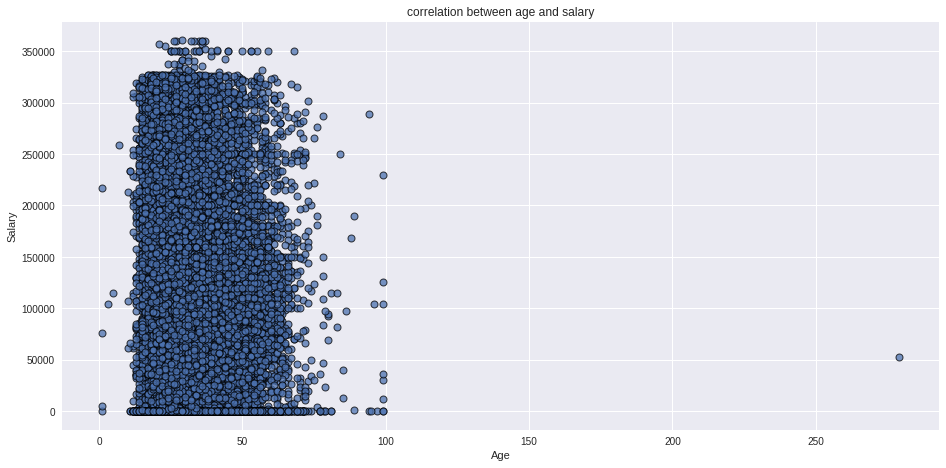

In [719]:
agess=new_df['Age']
salariess=new_df['SalaryUSD']
plt.scatter(agess,salariess,edgecolor='black',linewidth=1,alpha=0.75)


plt.title('correlation between age and salary')
plt.xlabel('Age')
plt.ylabel('Salary')

Through this plot, we understand that there is no correlation between the age and the salary.

#Exploratory data analysis (EDA)

First, we are going to look for the most popular programming language from the survey. We are going to use the counter to see the number of users of each programming language.

In [720]:
from matplotlib import pyplot as plt
import numpy as np
from collections import Counter

In [721]:
#plt.style.use("fivethirtyeight")
plt.style.use('seaborn')

In [722]:
mat_df=new_df[['LanguageWorkedWith']]

In [723]:
mat_df.head()

,LanguageWorkedWith
Respondent,
5,HTML/CSS;Ruby;SQL
8,Python;SQL
9,HTML/CSS;JavaScript;PHP
10,HTML/CSS;Java;JavaScript;Python;SQL
11,C#;JavaScript;Swift


In [725]:
mat_df.loc[5]['LanguageWorkedWith'].split(";")

['HTML/CSS', 'Ruby', 'SQL']

In [726]:
language_counter= Counter()

def clean_col(row):
  language_counter.update(row['LanguageWorkedWith'].split(";"))
  return row 
mat_df.apply(clean_col, axis=1)

print(language_counter)

Counter({'JavaScript': 29834, 'HTML/CSS': 27691, 'SQL': 24207, 'Python': 19379, 'Java': 17210, 'Bash/Shell/PowerShell': 15127, 'C#': 13845, 'TypeScript': 11467, 'PHP': 11228, 'C++': 10033, 'C': 9070, 'Go': 3850, 'Kotlin': 3450, 'Ruby': 3152, 'VBA': 2578, 'Assembly': 2566, 'Swift': 2546, 'R': 2490, 'Rust': 2304, 'Objective-C': 1707, 'Dart': 1670, 'Scala': 1583, 'Perl': 1301, 'Haskell': 907, 'missing': 400, 'Julia': 351})


Let's see the 15 most common programming languages.

In [727]:
print(language_counter.most_common(15))

[('JavaScript', 29834), ('HTML/CSS', 27691), ('SQL', 24207), ('Python', 19379), ('Java', 17210), ('Bash/Shell/PowerShell', 15127), ('C#', 13845), ('TypeScript', 11467), ('PHP', 11228), ('C++', 10033), ('C', 9070), ('Go', 3850), ('Kotlin', 3450), ('Ruby', 3152), ('VBA', 2578)]


In [728]:
languages=[]
popularity=[]
for item in language_counter.most_common(15):
  languages.append(item[0]) # appending the first item of the tuple which is the language to the list of languages.
  popularity.append(item[1]) #appending the second item of the tuple which is the popularity to the list of popularity.

In [729]:
print(languages)
print(popularity)

['JavaScript', 'HTML/CSS', 'SQL', 'Python', 'Java', 'Bash/Shell/PowerShell', 'C#', 'TypeScript', 'PHP', 'C++', 'C', 'Go', 'Kotlin', 'Ruby', 'VBA']
[29834, 27691, 24207, 19379, 17210, 15127, 13845, 11467, 11228, 10033, 9070, 3850, 3450, 3152, 2578]


In [730]:
print(languages)
print(popularity)

['JavaScript', 'HTML/CSS', 'SQL', 'Python', 'Java', 'Bash/Shell/PowerShell', 'C#', 'TypeScript', 'PHP', 'C++', 'C', 'Go', 'Kotlin', 'Ruby', 'VBA']
[29834, 27691, 24207, 19379, 17210, 15127, 13845, 11467, 11228, 10033, 9070, 3850, 3450, 3152, 2578]


Now, we have the most common 15 programming languages.

Let's plot the results.

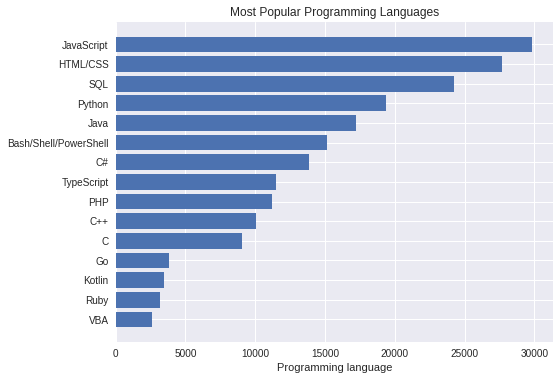

In [731]:
languages.reverse()
popularity.reverse()
plt.barh(languages,popularity)
plt.title("Most Popular Programming Languages")
plt.xlabel("Programming language")
#plt.ylabel("Number of programmers")

plt.tight_layout()
plt.show()

So, through this bar plot, we can visualize the most popular 15 programming languages. 

JavaScript is the number 1 with over 29834 programmers using it. 
Then come HTML/CSS, SQL and python. 



Let's plot popular programming languages using a pie chart. 
We are going to take the 5 popular languages.

In [732]:
popularity.reverse()
languages.reverse()
#we reverse the lists to have the most popular languages first

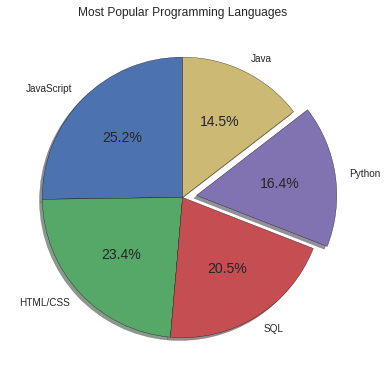

In [733]:
slices=popularity[:5]
labels=languages[:5]
explode=[0,0,0,0.1,0]

plt.pie(slices, labels=labels, explode=explode, shadow= True,
        autopct='%1.1f%%',startangle=90,  wedgeprops={'edgecolor':'black'})

plt.title("Most Popular Programming Languages")
plt.tight_layout()
plt.show()

Our goal next is to see the popularity of python for the different ages and based on the salaries of programmers. 

We are going to take the programmers from the age of 25 to the age of  60. 
Then, we are going to take the meadian salary for each age

In [734]:
df_ages=new_df[(new_df['Age'] >= 25) & (new_df['Age'] <60)]

In [735]:
df_ages.sort_values(by=['Age','SalaryUSD'],ascending=[True,False],inplace= True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [736]:
df_g=df_ages.groupby(['Age'], as_index=False).median()

In [737]:
df_g.head()
#df_g is the dataframe containing the median salary for each age

,Age,SalaryUSD
0,25,38388.0
1,26,41363.0
2,27,45951.0
3,28,48215.5
4,29,51333.5


In [738]:
df_g.rename(columns={"SalaryUSD": "All_Devs"}, inplace=True)

In [739]:
df_g.head()

,Age,All_Devs
0,25,38388.0
1,26,41363.0
2,27,45951.0
3,28,48215.5
4,29,51333.5


Here we have the median salary for each age.

Now, we are going to take the median salary of the people who said they knew python.

In [740]:
filt= df_ages['LanguageWorkedWith'].str.contains('Python')
df_py= df_ages.loc[filt,['Age','LanguageWorkedWith','SalaryUSD']]
df_py.head()

,Age,LanguageWorkedWith,SalaryUSD
Respondent,,,
34021,25,HTML/CSS;Java;JavaScript;Python;TypeScript,350232.0
58289,25,Python;Rust,350000.0
17917,25,Java;JavaScript;Python,326591.0
55527,25,HTML/CSS;JavaScript;Python;SQL,325490.0
5039,25,Assembly;Bash/Shell/PowerShell;Haskell;JavaScr...,325000.0


In [741]:
df_gpy=df_py.groupby(['Age'], as_index=False).median()

In [742]:
df_gpy.head()
#df_gpy is the dataframe containing the median salary for each age but just for those who know pyhton

,Age,SalaryUSD
0,25,42780.0
1,26,46891.0
2,27,51960.0
3,28,54672.0
4,29,58368.0


In [743]:
df_gpy.rename(columns={"SalaryUSD": "Python"}, inplace=True)

In [744]:
df_gpy.head()

,Age,Python
0,25,42780.0
1,26,46891.0
2,27,51960.0
3,28,54672.0
4,29,58368.0


In [745]:
df_gpy.drop(columns=['Age'],inplace=True)

In [748]:
s1 = df_gpy.squeeze()

Now, we are going to take the median salary of the people who said they knew Javascript.

In [749]:
filt2= df_ages['LanguageWorkedWith'].str.contains('JavaScript')
df_js= df_ages.loc[filt2,['Age','LanguageWorkedWith','SalaryUSD']]
df_js.head()


,Age,LanguageWorkedWith,SalaryUSD
Respondent,,,
34021,25,HTML/CSS;Java;JavaScript;Python;TypeScript,350232.0
17917,25,Java;JavaScript;Python,326591.0
55527,25,HTML/CSS;JavaScript;Python;SQL,325490.0
5039,25,Assembly;Bash/Shell/PowerShell;Haskell;JavaScr...,325000.0
61957,25,Assembly;Bash/Shell/PowerShell;C;C++;HTML/CSS;...,323661.0


In [750]:
df_gjs=df_js.groupby(['Age'], as_index=False).median()

In [751]:
df_gjs.rename(columns={"SalaryUSD": "Javascript"}, inplace=True)

In [752]:
df_gjs.head()
#df_gjs is the dataframe containing the median salary for each age but just for those who know javascript


,Age,Javascript
0,25,37752.0
1,26,38915.0
2,27,46218.0
3,28,47826.0
4,29,49200.0


In [753]:
df_gjs.drop(columns=['Age'],inplace=True)

In [754]:
s2 = df_gjs.squeeze()

* df_g is the dataframe containing the median salary for each age.
* df_gpy is the dataframe containing the median salary for each age but just for those who know pyhton.
* df_gjs is the dataframe containing the median salary for each age but just for those who know javascript.

Now, we're going to combine these dataframes 


In [755]:
df1 = pd.concat([df_g, s1], axis=1)
df_salaries = pd.concat([df1, s2], axis=1)

In [756]:
df_salaries.head()

,Age,All_Devs,Python,Javascript
0,25,38388.0,42780.0,37752.0
1,26,41363.0,46891.0,38915.0
2,27,45951.0,51960.0,46218.0
3,28,48215.5,54672.0,47826.0
4,29,51333.5,58368.0,49200.0


In [757]:
#the overall median salary
overall_median=new_df['SalaryUSD'].median() 
overall_median

58167.0

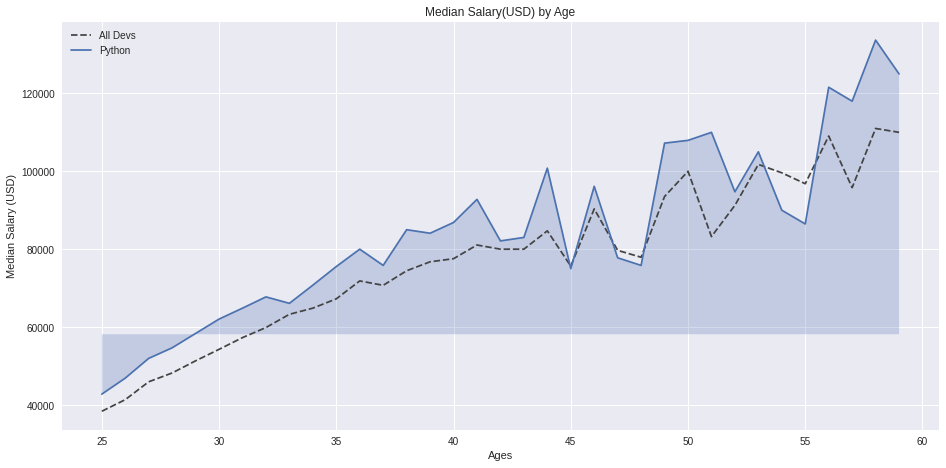

In [758]:
plt.rcParams["figure.figsize"] = (14,7)
ages=df_salaries['Age']
dev_salaries= df_salaries['All_Devs']
py_salaries= df_salaries['Python']
js_salaries= df_salaries['Javascript']
plt.plot(ages,dev_salaries,color='#444444',linestyle='--',label='All Devs')
plt.plot(ages,py_salaries,label='Python')
plt.fill_between(ages,py_salaries,overall_median,alpha=0.25)
plt.legend()
plt.title('Median Salary(USD) by Age')
plt.xlabel('Ages',)
plt.ylabel('Median Salary (USD)')
plt.show()

This graph is showing us exactly where our python plot crossed the overall median salary. So, when our python plot is below our overall median salary,it fills up to that point. 
And, when our plot is above the overall median salary, it fills down to that point.

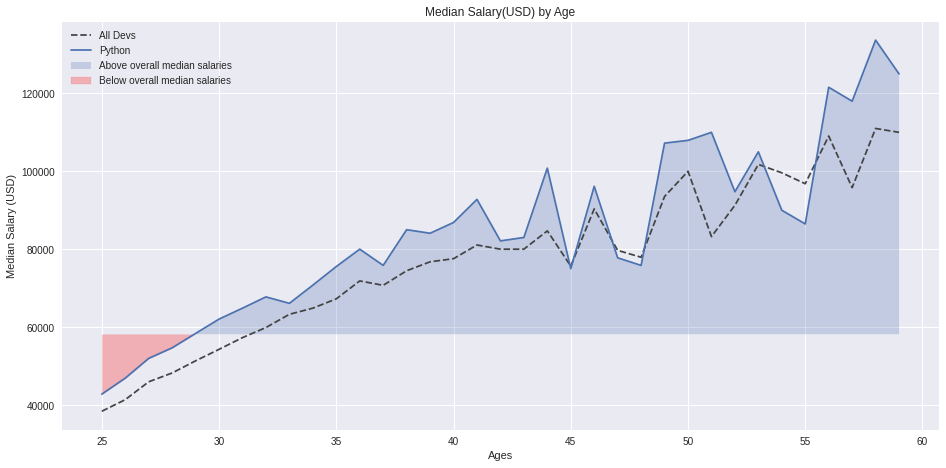

In [760]:
plt.plot(ages,dev_salaries,color='#444444',linestyle='--',label='All Devs')
plt.plot(ages,py_salaries,label='Python')
plt.fill_between(ages,py_salaries,overall_median,where=(py_salaries>overall_median),interpolate=True,alpha=0.25,label='Above overall median salaries')
#we have added the where clause for py_salaries are higher than the overall median salary
plt.fill_between(ages,py_salaries,overall_median,where=(py_salaries<=overall_median),interpolate=True,alpha=0.25,label='Below overall median salaries',color='Red')
plt.legend()
plt.title('Median Salary(USD) by Age')
plt.xlabel('Ages',)
plt.ylabel('Median Salary (USD)')
plt.show()

we can see that we're doing that fill where python plot is above that overall median salary with the blue color and when it is below, it is plotting up to that point with red color. 





Now, let's change the overall median salry with the dev-salaries

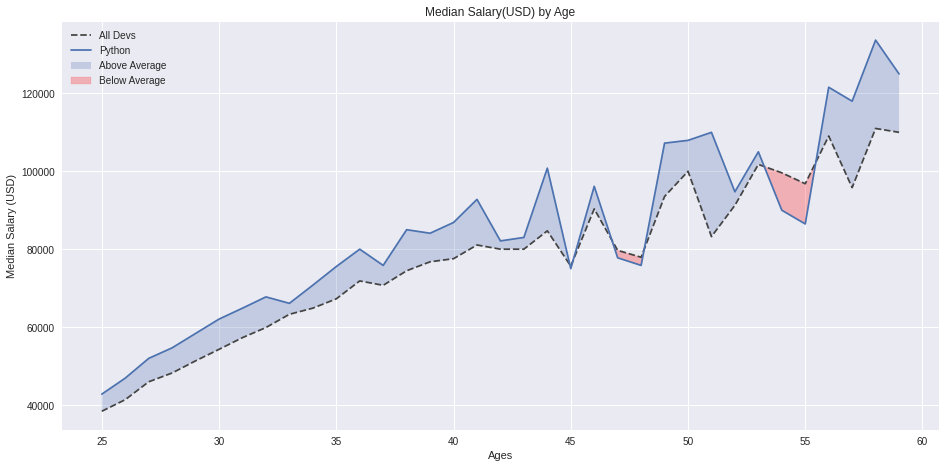

In [761]:
plt.plot(ages,dev_salaries,color='#444444',linestyle='--',label='All Devs')
plt.plot(ages,py_salaries,label='Python')
plt.fill_between(ages,py_salaries,dev_salaries,where=(py_salaries>dev_salaries),interpolate=True,alpha=0.25,label='Above Average')
plt.fill_between(ages,py_salaries,dev_salaries,where=(py_salaries<=dev_salaries),interpolate=True,alpha=0.25,label='Below Average',color='Red')
plt.legend()
plt.title('Median Salary(USD) by Age')
plt.xlabel('Ages',)
plt.ylabel('Median Salary (USD)')
plt.show()

So in this case, when the python salaries are above th all_devs salaries it is plotted with blue. 
When it's under it is plotted red. 
Notice that it is red for higher ages. It starts from 45. 
This plot, shows how much python is popular among young programmers and that programmers who know python are paid better than those who doesn't. 


Let's compare the salaries of people who know javascript to average. 

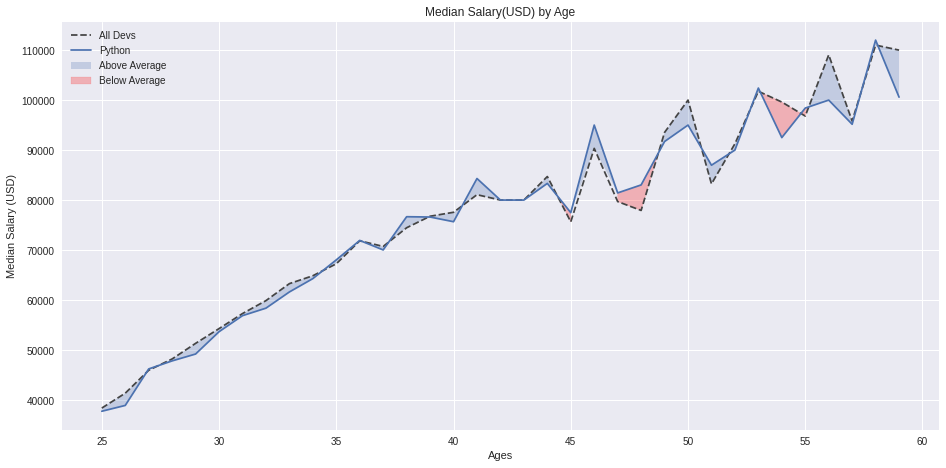

In [790]:
plt.plot(ages,dev_salaries,color='#444444',linestyle='--',label='All Devs')
plt.plot(ages,js_salaries,label='Python')
plt.fill_between(ages,js_salaries,dev_salaries,where=(py_salaries>dev_salaries),interpolate=True,alpha=0.25,label='Above Average')
plt.fill_between(ages,js_salaries,dev_salaries,where=(py_salaries<=dev_salaries),interpolate=True,alpha=0.25,label='Below Average',color='Red')
plt.legend()
plt.title('Median Salary(USD) by Age')
plt.xlabel('Ages',)
plt.ylabel('Median Salary (USD)')
plt.show()

we can see that the difference between the salaries of people who know python and the average was higher than the difference betwenn the salaries of people who know JavaScript and the average. 

The reason behind this could be that Javascript is more known among programmers than python. We have seen through this survey that programmers who know JavaScript are 29834.
However, those who know python are 19379. 
It could be the fact that python is not a common skill makes it highly damanded and highly paid.

Now, let's visulize the plots together.

In [762]:
ages=df_salaries['Age']
dev_salaries= df_salaries['All_Devs']
py_salaries= df_salaries['Python']
js_salaries= df_salaries['Javascript']

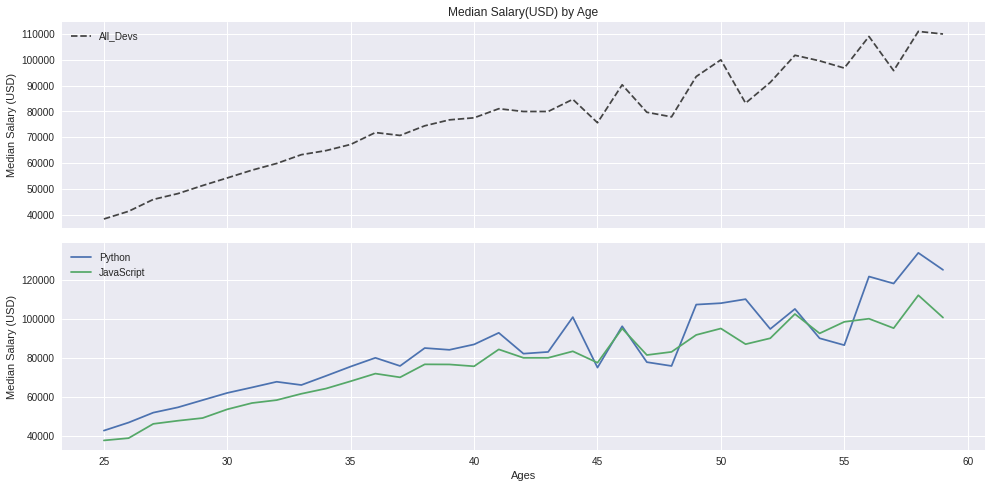

In [763]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True )
ax1.plot(ages,dev_salaries,color='#444444',linestyle='--',label='All_Devs')

ax2.plot(ages,py_salaries,label='Python')
ax2.plot(ages,js_salaries,label='JavaScript')

ax1.legend()
ax1.set_title('Median Salary(USD) by Age')
ax1.set_ylabel('Median Salary (USD)')

ax2.legend()
ax2.set_xlabel('Ages')
ax2.set_ylabel('Median Salary (USD)')

plt.tight_layout()
plt.show()

Although JavaScript is the most popular language as we saw earlier, still people who said who knew python are paid higher than those who said they know JavaScript in the survey. 
This difference is mostly highlighted in younger ages. 
Starting from the age of 45, salaries started to get equal.
Then this difference started to grow more around the age of 50. 
The conclusion we can conduct from this analysis is that python salaries are higher than average and higher than those who know javaScript without knowing python.

Now, we are going to have an idea of the number of respondants for each age.

That's why, We are going to plot how many responses we got from each age. 


In [791]:
df_age=new_df[(new_df['Age'] >= 20) & (new_df['Age'] <90)]

In [792]:
ages=df_age['Age']

In [793]:
bins=[20,30,40,50,60,70,80,90]

In [794]:
median_age=df_age['Age'].median()
median_age

29.0

Text(0, 0.5, 'Total Respondants')

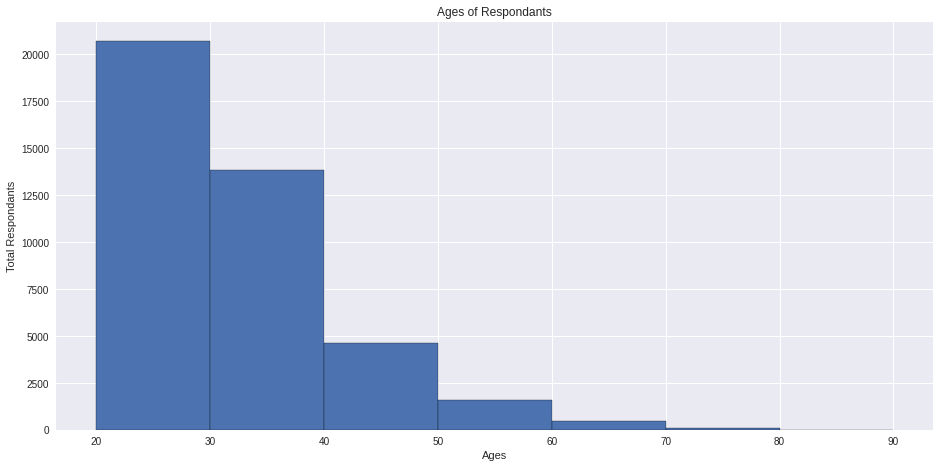

In [795]:
plt.hist(ages, bins=bins, edgecolor='black')
plt.title('Ages of Respondants')
plt.xlabel('Ages')
plt.ylabel('Total Respondants')

The reason it's not showing the number of respondants for the ages from 70 to 80 and from 80 to 90 is that they are less than the other numbrs. So we are going to show it on a logarithmique scal.

Text(0, 0.5, 'Total Respondants')

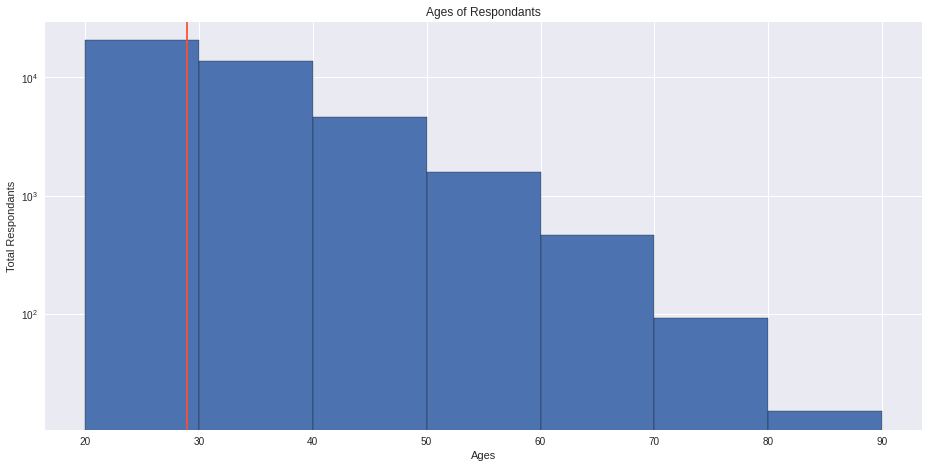

In [796]:
color='#fc4f30'
plt.hist(ages, bins=bins, edgecolor='black',log=True)
plt.axvline(29,color=color,label='Age Median')
plt.title('Ages of Respondants')
plt.xlabel('Ages')
plt.ylabel('Total Respondants')

Now,we are able to see all of the results. 
Also, within our histogram, we now have a vertical line which is the age median.
It tells us how many people are falling in which age groupe and also where the median is for those survey results.

Now, we are going to see the number of participants in the survey from each country.

In [797]:
country_respondents= new_df['Country'].value_counts()
country_respondents
#this is the total people from each country who responded to the survey

United States     9106
India             4368
Germany           2989
United Kingdom    2785
Canada            1588
                  ... 
Nauru                1
Guinea               1
Eritrea              1
Timor-Leste          1
Djibouti             1
Name: Country, Length: 170, dtype: int64

In [798]:
list_countries=[]
list_counts=[]

In [799]:
for idx,name in enumerate(new_df['Country'].value_counts().index.tolist()):
  list_countries.append(name)
  list_counts.append(new_df['Country'].value_counts()[idx])
   

In [800]:
#we are going to select the most countries that have a high number of participants in the survey
countries= list_countries[:10]
counts=list_counts[:10]
countries.reverse()
counts.reverse()

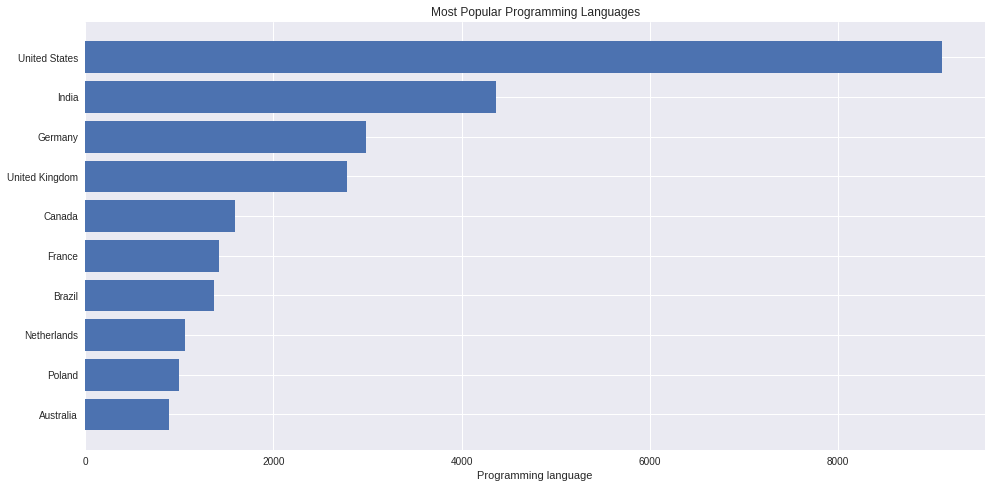

In [801]:
plt.barh(countries,counts)
plt.title("Most Popular Programming Languages")
plt.xlabel("Programming language")
#plt.ylabel("Number of programmers")

plt.tight_layout()
plt.show()

So, through this bar plot, we can visualize the most countries that have a high number of participants in the survey. 

United States is the number 1 with over 9106 programmers living there that answered the survey. 
Then come India, Germany and the United Kingdom. 


Let's plot popular countries using a pie chart. We are going to take the 5 top countries.

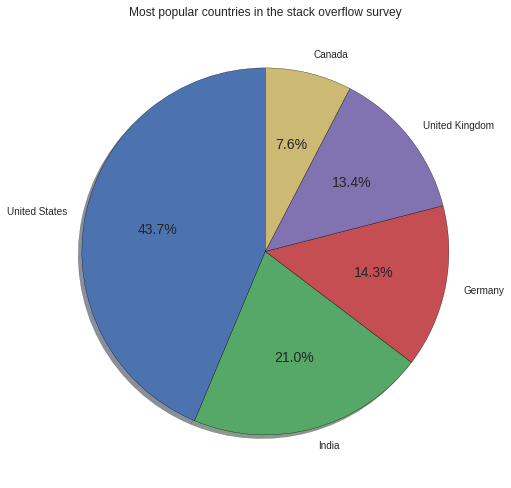

In [802]:
slices=list_counts[:5] 
labels=list_countries[:5]


plt.pie(slices, labels=labels, shadow= True,
        autopct='%1.1f%%',startangle=90,  wedgeprops={'edgecolor':'black'})

plt.title("Most popular countries in the stack overflow survey")
plt.tight_layout()
plt.show()

Now, we want to see the pourcentage of people who know python in each country. 


In [803]:
#create the filter 
high_salary =(new_df['SalaryUSD']>70000)
#apply the filter 
new_df.loc[high_salary,['Country','SalaryUSD']]

,Country,SalaryUSD
Respondent,,
8,United States,116000.0
9,Tunisia,173660.0
16,United Kingdom,108576.0
17,United States,79000.0
19,United States,83400.0
...,...,...
64394,Czech Republic,238653.0
64711,Nepal,83706.0
64810,United States,74500.0


In [804]:
country_grp = new_df.groupby(['Country'])


In [805]:
country_uses_python =country_grp['LanguageWorkedWith'].apply(lambda x: x.str.contains('Python').sum())
country_uses_python
#this is the number of people from each country who said that that they use python


Country
Afghanistan                              8
Albania                                 10
Algeria                                 25
Andorra                                  1
Angola                                   0
                                        ..
Venezuela, Bolivarian Republic of...    26
Viet Nam                                67
Yemen                                    0
Zambia                                   3
Zimbabwe                                10
Name: LanguageWorkedWith, Length: 170, dtype: int64

In [806]:
python_df = pd.concat([country_respondents,country_uses_python], axis='columns',sort=False) 
python_df

,Country,LanguageWorkedWith
United States,9106,4603
India,4368,1749
Germany,2989,1403
United Kingdom,2785,1229
Canada,1588,778
...,...,...
Nauru,1,0
Guinea,1,0
Eritrea,1,0
Timor-Leste,1,1


In [807]:
python_df.rename(columns={'Country':'NumRespondents','LanguageWorkedWith':'NumKnowsPython'},inplace=True)

In [808]:
python_df.sort_values(by=['NumRespondents'],ascending=False)

,NumRespondents,NumKnowsPython
United States,9106,4603
India,4368,1749
Germany,2989,1403
United Kingdom,2785,1229
Canada,1588,778
...,...,...
Saint Vincent and the Grenadines,1,0
Lesotho,1,0
Mauritania,1,1
Papua New Guinea,1,1


In [809]:
python_df['PctKnowsPython']= (python_df['NumKnowsPython']/python_df['NumRespondents'])*100
python_df

,NumRespondents,NumKnowsPython,PctKnowsPython
United States,9106,4603,50.549089
India,4368,1749,40.041209
Germany,2989,1403,46.938776
United Kingdom,2785,1229,44.129264
Canada,1588,778,48.992443
...,...,...,...
Nauru,1,0,0.000000
Guinea,1,0,0.000000
Eritrea,1,0,0.000000
Timor-Leste,1,1,100.000000


In [810]:
highp_countries=python_df.head(15)

In [811]:
highp_countries

,NumRespondents,NumKnowsPython,PctKnowsPython
United States,9106,4603,50.549089
India,4368,1749,40.041209
Germany,2989,1403,46.938776
United Kingdom,2785,1229,44.129264
Canada,1588,778,48.992443
France,1422,689,48.452883
Brazil,1369,532,38.860482
Netherlands,1064,463,43.515038
Poland,1001,429,42.857143
Australia,888,411,46.283784


In [812]:
highp_countries.sort_values(by='PctKnowsPython',ascending=False)

,NumRespondents,NumKnowsPython,PctKnowsPython
United States,9106,4603,50.549089
Canada,1588,778,48.992443
France,1422,689,48.452883
Germany,2989,1403,46.938776
Australia,888,411,46.283784
United Kingdom,2785,1229,44.129264
Sweden,689,301,43.686502
Netherlands,1064,463,43.515038
Poland,1001,429,42.857143
Spain,855,366,42.807018


The United States have the highest percentage of people who know python.which is 50.55%. Then, we have Canada with 49%. Then, we have France and Germany. 

#Conclusion

In this project, we were able to go through the 2020 stack overflow surveys data which is a real time data collected by Stack overflow in which many participants from many countries have answered severall questions about their carreers. 

The first challenge we had to face is to assess and understand this data. We focused on the ages, the countries and the programming languages. 
We were able also to highlight some other aspects like the percentage of people who practice programming as a hobby. 

Second, We dealt with cleaning the data and outliers.
Since this data is from a survey participants don't answer all the questions given. Which leave us with a significant amount of missing data. 

Finally, we found out how much python is popular and the fact that programmers who know this programming language are paid higher than the others.

we saw that the difference between the salaries of people who know python and the average was higher than the difference betwenn the salaries of people who know JavaScript and the average. 

The reason behind this could be that Javascript is more known among programmers than python. We have seen through this survey that programmers who know JavaScript are 29834.
However, those who know python are 19379. 
It could be the fact that python is not a common skill makes it a highly demanded and a highly paid skill.

So, python is an important language for job seekers. You can improve your skills in python and have better chances to find a jobs with better salaries. 

We also found the countries that have highest percentage of people who know python. We have the United States with the highest percentage of people who know python which is 50.55%. Then, we have Canada with 49%. Then, we have France and Germany. 